<a href="https://colab.research.google.com/github/hscrown/bigdata/blob/main/05_1_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [3]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


특성 스케일이 다르니 스케일 해주자

In [9]:
# 데이터 프레임을 넘파이  배열로 바꾸기
data = wine.drop(columns=['class']).to_numpy()
target = wine['class'].to_numpy()

In [11]:
## 데이터 스플릿
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5197, 3) (1300, 3) (5197,) (1300,)


In [13]:
## 데이터 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

로지스틱 회귀 모델로 훈련

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr.score(X_train_scaled, y_train)
lr.score(X_test_scaled, y_test)

0.7776923076923077

In [15]:
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


### 이유를 설명하기 쉬운 "결정트리"
- 사이킥런의 DecisionTreeClassifier()

In [18]:
# DecisionTreeClassifier 모델 임포트
from sklearn.tree import DecisionTreeClassifier

# 모델 객체 생성
# DecisionTreeClassifier는 분류를 위한 결정 트리 모델
dt = DecisionTreeClassifier()

# 훈련 데이터로 모델 학습
# X_train_scaled는 특성(입력 데이터), y_train은 해당 특성에 대한 레이블(타겟 데이터)
dt.fit(X_train_scaled, y_train)

# 훈련 데이터에 대한 정확도 계산
# 훈련 데이터에 대해 얼마나 잘 예측했는지 확인
dt.score(X_train_scaled, y_train)

# 테스트 데이터에 대한 정확도 계산
# 테스트 데이터는 모델이 학습하지 않은 데이터로, 모델이 얼마나 잘 일반화되었는지 평가
dt.score(X_test_scaled, y_test)


0.996921300750433


0.8561538461538462

훈련 스코어가 높지만 test 스코어가 낮아서 과대적합된 모델로 보임.
시각화 해보자

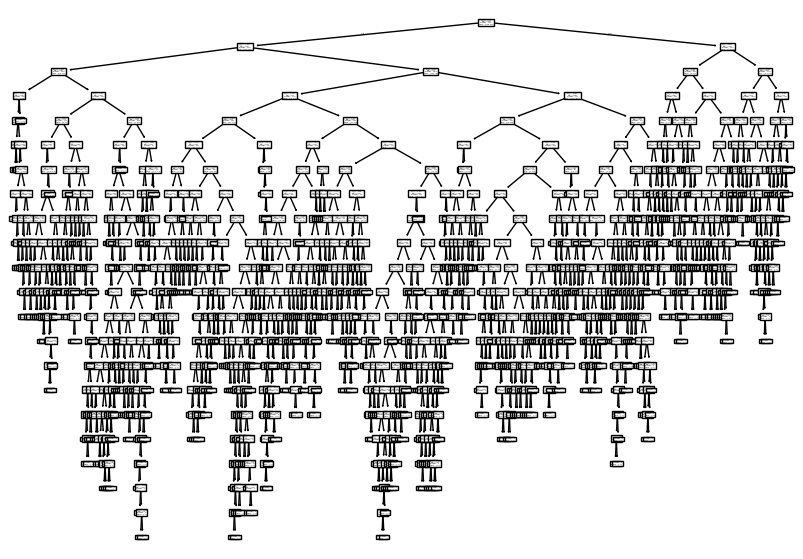

In [17]:
# 모델 시각화를 위한 라이브러리 임포트
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 트리 구조를 그리기 위한 그림 크기 설정
plt.figure(figsize=(10,7))

# 결정 트리 시각화
# dt는 학습된 결정 트리 모델이며, 이를 시각화
plot_tree(dt)

# 시각화된 트리 구조를 화면에 표시
plt.show()

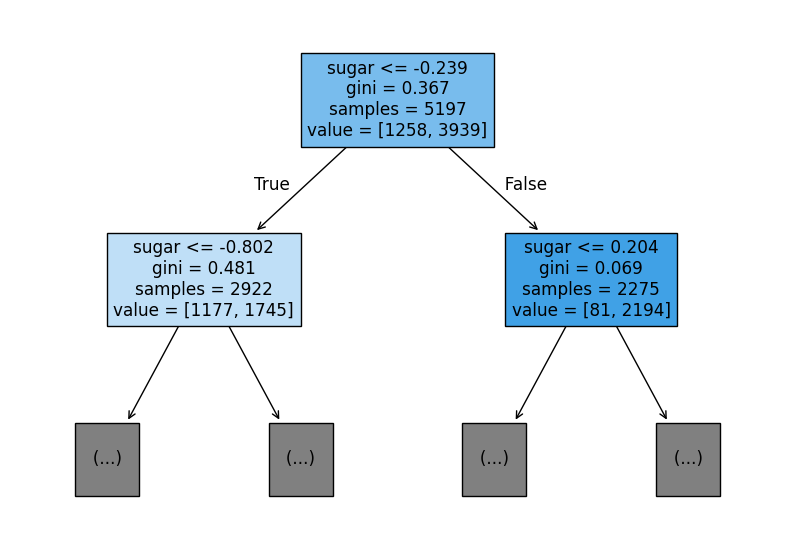

In [20]:
# 트리 구조를 그리기 위한 그림 크기 설정
plt.figure(figsize=(10, 7))

# 피처 이름을 변수로 설정
feature_names = ['alcohol', 'sugar', 'PH']

# plot_tree() 함수로 결정 트리 시각화
# max_depth=3: 트리의 깊이를 3으로 제한
# max_depth=1: 트리의 깊이를 1로 주면 루트 노드를 제외하고 하나의 노드를 더 확장하여 그
# filled=True: 트리 노드를 색상으로 채워서 각 노드의 예측 클래스 확률을 시각적으로 나타냄
# feature_names=feature_names: 각 분할에서 사용된 피처 이름을 트리에 추가
plot_tree(dt, max_depth=1, filled=True, feature_names=feature_names)

# 시각화된 트리 구조를 화면에 표시
plt.show()


#### 가지치기 = 과대적합 줄이기
- 끝없이 가지치기하면 끝없이 늘어남
- max_depth = 3으로 줘서 트리의 성장을 지정 (max_iter 아님!!)

In [25]:
# DecisionTreeClassifier 모델 임포트
from sklearn.tree import DecisionTreeClassifier

# 모델 객체 생성
# DecisionTreeClassifier는 분류를 위한 결정 트리 모델
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

# 훈련 데이터로 모델 학습
# X_train_scaled는 특성(입력 데이터), y_train은 해당 특성에 대한 레이블(타겟 데이터)
dt.fit(X_train_scaled, y_train)

# 훈련 데이터에 대한 정확도 계산
# 훈련 데이터에 대해 얼마나 잘 예측했는지 확인
dt.score(X_train_scaled, y_train)

# 테스트 데이터에 대한 정확도 계산
# 테스트 데이터는 모델이 학습하지 않은 데이터로, 모델이 얼마나 잘 일반화되었는지 평가
dt.score(X_test_scaled, y_test)


0.8415384615384616

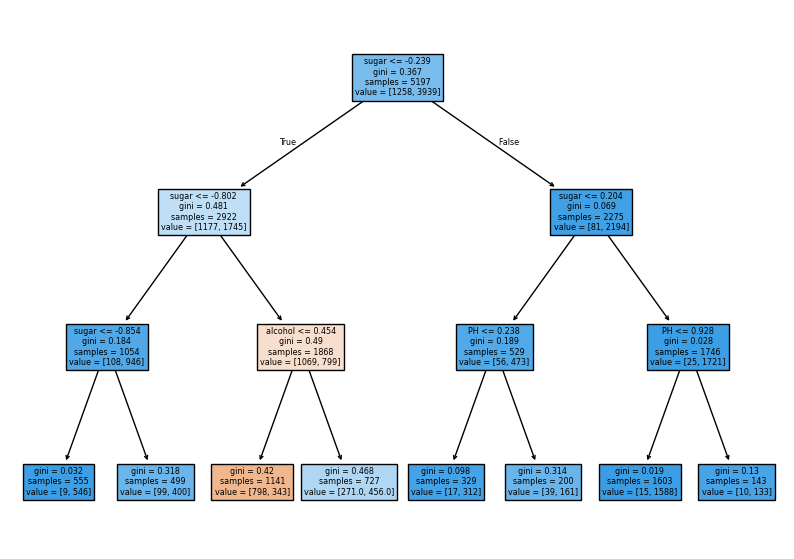

In [27]:
# 시각화
plt.figure(figsize=(10, 7))
feature_names = ['alcohol', 'sugar', 'PH']
plot_tree(dt, max_depth=3, filled=True, feature_names=feature_names)
plt.show()

왼쪽에서 세번째 있는 노드만 음성클래스
<br> 이 노드에 도착해야만 레드 와인으로 분류
- 당도가 음수인데 이상함
- 불순도를 기준으로 샘플을 나누기때문에 특성값 스케일이 영향을 미치지 않음
- 따라서 스케일링이 필요없으므로 스케일하기 전의 데이터로 훈련하자


In [29]:
# 스케일 하기 전의 데이터로 훈련
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
dt.score(X_test, y_test)

0.8454877814123533


0.8415384615384616

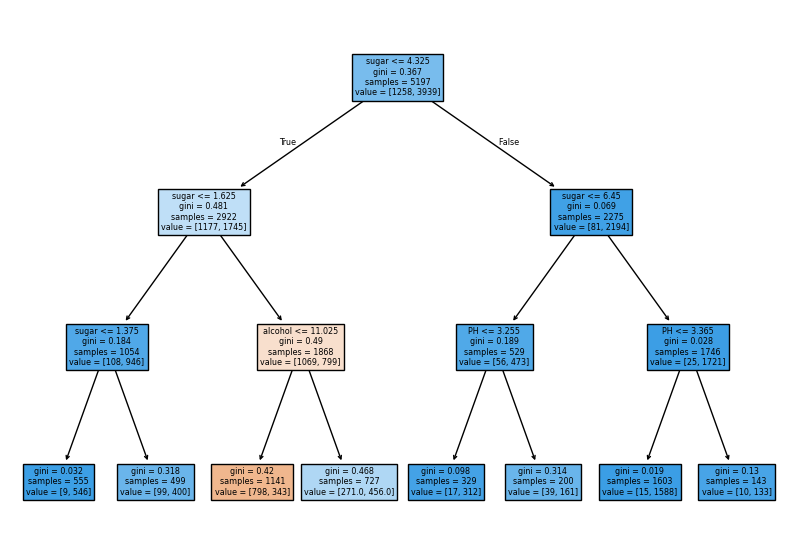

In [30]:
# 시각화
plt.figure(figsize=(10, 7))
feature_names = ['alcohol', 'sugar', 'PH']
plot_tree(dt, max_depth=3, filled=True, feature_names=feature_names)
plt.show()